In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np



In [2]:
fits_file = "https://archive.stsci.edu/missions/k2/lightcurves/c3/20600000/10000/ktwo206050032-c03_slc.fits"


In [3]:
fits.info(fits_file)


Filename: /Users/Riley/.astropy/cache/download/py3/4e643a81511dcb9f6865a86b9ba0570f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      54   ()      
  1  LIGHTCURVE  BinTableHDU    155   101580R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE    ImageHDU        48   (11, 9)   int32   


In [4]:
fits.getdata(fits_file, ext=1).columns


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [5]:
with fits.open(fits_file, mode="readonly") as hdulist:
    k2_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    sap_errors = hdulist[1].data['SAP_FLUX_ERR']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_fluxes_err = hdulist[1].data['PDCSAP_FLUX_ERR']


(2147.2, 2147.3)

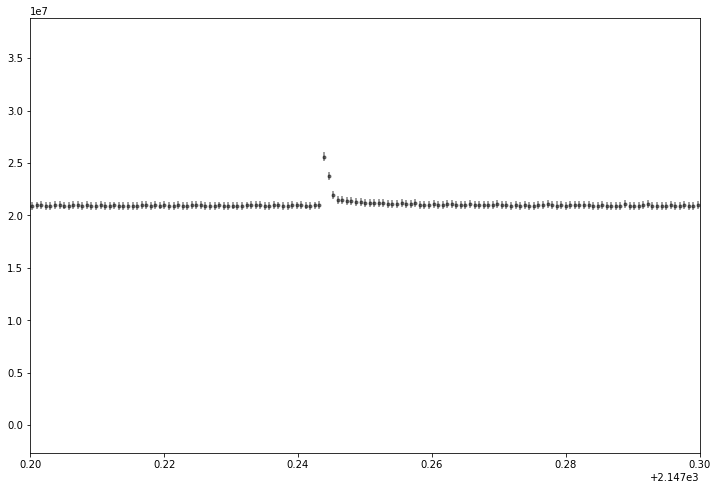

In [6]:
### Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
#ax.plot(k2_bjds, pdcsap_fluxes, 'ko')
ax.errorbar(k2_bjds, pdcsap_fluxes, 
             yerr=pdcsap_fluxes_err*10, fmt='.', color='k', alpha=0.5)
ax.set_xlim(2147.2, 2147.3)#.2441


In [9]:
flr = np.where(pdcsap_fluxes > np.std(pdcsap_fluxes))

/Users/Riley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [21]:
fluxnans = np.where(np.isnan(pdcsap_fluxes) == False)[0]
pdcsap_fluxes[fluxnans]

array([20891302., 20815686., 20762762., ..., 21010280., 20960358.,
       20976172.], dtype=float32)

In [36]:
flr = np.where((pdcsap_fluxes[fluxnans] - np.mean(pdcsap_fluxes[fluxnans])) > 3*np.std(pdcsap_fluxes[fluxnans]))[0]

<Container object of 3 artists>

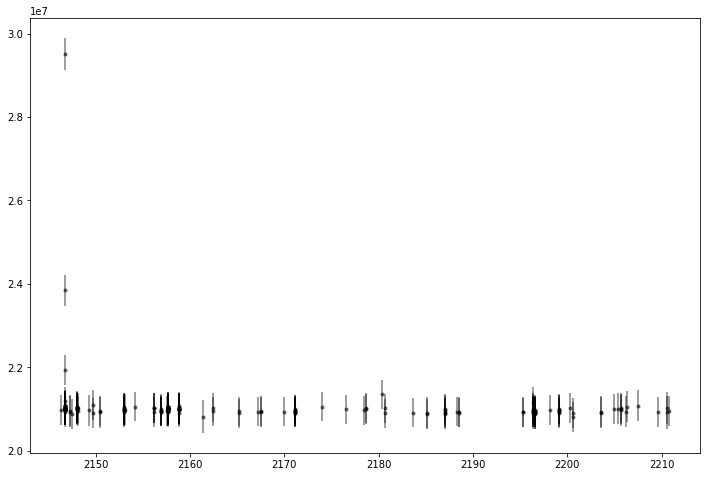

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
#ax.plot(k2_bjds, pdcsap_fluxes, 'ko')
ax.errorbar(k2_bjds[flr], pdcsap_fluxes[flr], 
             yerr=pdcsap_fluxes_err[flr]*10, fmt='.', color='k', alpha=0.5)
#ax.set_xlim(2147.2, 2147.3)#.2441